<div class="alert alert-block alert-success">
This jupyter notebook is part of the supplementary material for the book "Materials Data Science" (Stefan Sandfeld, Springer, 2024, DOI 10.1007/978-3-031-46565-9). For further details please refer to the accompanying webpage at <a href="https://mds-book.org">https://mds-book.org</a>.
</div>

In [85]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

## 11.5 Data Preprocessing

The goal of data preprocessing or data preparation is to transform the collected
data into something that can be used directly for statistical analysis or ML.

### 11.5.1 Data Cleaning
### 11.5.2 Outlier detection
### 11.5.3 Data Transformation

#### Data shifting
Shifting of data implies moving all points by a constant value along an axis. For multivariate data this can be done with different constant for each of the directions/random variables. <b>Data centering</b> is a special case where the offsets are chosen such that the mean values of the distribution is located

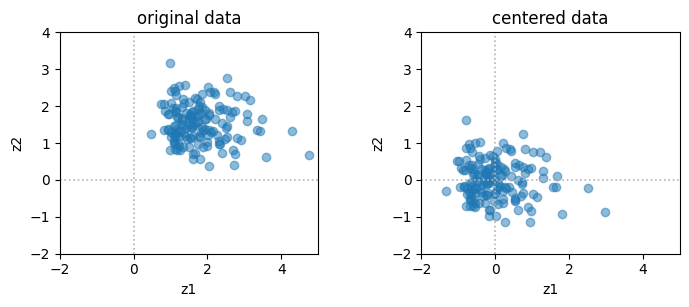

In [86]:
rng = np.random.default_rng()

n_data = 150
z1 = rng.lognormal(mean=0.5, sigma=0.4, size=n_data)
z2 = rng.normal(loc=1.5, scale = 0.5, size=n_data)


fig, ax = plt.subplots(ncols=2, figsize=(8, 3.5), gridspec_kw={'wspace': 0.4})
ax[0].scatter(z1, z2, alpha=0.5)
ax[0].set_title('original data')


# now, center the data by shifting them by the mean
ax[1].scatter(z1 - z1.mean(), z2 - z2.mean(), alpha=0.5)
ax[1].set_title('centered data')

# show the coordinate axes and add some x/y-labels
for a in ax:
    a.axvline(0, lw=1.2, c='0.7', ls=':')
    a.axhline(0, lw=1.2, c='0.7', ls=':')
    a.set(xlim=(-2, 5), ylim=(-2, 4), aspect='equal',
          xlabel='z1', ylabel='z2')


#### Data scaling
Scaling typically implies a linear mapping of the data or values to a “more suitable”
range, i. e., 
$$X \mapsto \lambda X$$ 
where $\lambda$ is a constant. Upon scaling of a variable also the mean and the standard deviation are scaled linearly by the same constant.

original data: mean = 1.805, std. dev. = 0.988
scaled data: mean = 3.611, std. dev. = 1.975
... which shows that mean and std. dev. are also bot scaled by the same factor.


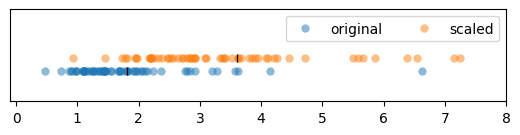

In [87]:
# Use the same lognormal distribution as above
rng = np.random.default_rng()
X = rng.lognormal(mean=0.5, sigma=0.4, size=60)

# and show the data. The little vertical dash indicated the mean
fig, ax = plt.subplots()
ax.plot(X, np.zeros_like(X), 'o', alpha=0.5, lw=0, mew=0, label='original')
ax.plot(X.mean(), 0, 'k|')
print(f"original data: mean = {X.mean():.3f}, std. dev. = {X.std():.3f}")

# now do the scaling:
factor = 2
X = factor * X

# ... and again plot the data from which you can -- visually -- understand
# that the mean and std. dev. are also both scaled linearly.
ax.plot(X, 0.2 * np.ones_like(X), 'o', alpha=0.5, lw=0, mew=0, label='scaled')
ax.plot(X.mean(), 0.2, 'k|')

ax.set(aspect='equal', xlim=(-0.1, 8), ylim=(-0.5, 1), yticks=[])
ax.legend(ncol=2)

print(f"scaled data: mean = {X.mean():.3f}, std. dev. = {X.std():.3f}")
print("... which shows that mean and std. dev. are also bot scaled by the same factor.")